In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [342]:
telecom_df_base=pd.read_csv('telecom_churn_data.csv', encoding='iso-8859-1')
telecom_plot_base=telecom_df_base.reset_index()
master_df=telecom_df_base.copy()
print(telecom_df_base.shape)

(99999, 226)


### Utilities Method

In [343]:
def null_na_estimator_grph(data_f,limit_val=None,graphical=False,size=(None,None)):
    """will return the % amount of null in data frame
       df: panda.DataFrame
       limit_val= (default=None) threshold value, example if limit_val=7, the estimator will return na with >=7
    """
    df=data_f.copy()
    est_ser=est_ser= (round(df.isna().sum()/len(df.index)*100,2)).sort_values(ascending=False)
    if limit_val!=None:
        est_ser= est_ser[est_ser>=limit_val]
    if graphical==True:
        df=pd.DataFrame(est_ser).reset_index()
        plt.figure(figsize=size)
        plt.xticks(rotation=90)
        fig=sns.barplot(data=df,x='index',y=0)
        fig.set_ylabel('Percentage')
        return fig
    else:
        return est_ser

In [344]:
def data_set_structure(df,return_tuple=False):
    """It will return the structure of dataframe or columns tuple as list
    out: tuple (non-num,num,month_6,month_7,month_8,month_9)
       : datafram ->structuring the complete dataset bifurcation
    """
    df_col=df.columns
    non_num_col=df.describe(include=['object']).columns
    num_col=df_col.difference(non_num_col)
    data_col_month=[x for x in df_col if re.search('_[0-9]$',x)!=None]
    col_9=[x for x in df_col if re.search('_9',x)!=None]
    col_8=[x for x in df_col if re.search('_8',x)!=None]
    col_7=[x for x in df_col if re.search('_7',x)!=None]
    col_6=[x for x in df_col if re.search('_6',x)!=None]
    col_9_n=[x for x in num_col if re.search('_9',x)!=None]
    col_8_n=[x for x in num_col if re.search('_8',x)!=None]
    col_7_n=[x for x in num_col if re.search('_7',x)!=None]
    col_6_n=[x for x in num_col if re.search('_6',x)!=None]
    
    if return_tuple==True:
        return non_num_col.tolist(),num_col.tolist(),col_6,col_7,col_8,col_9
    else:
        result=pd.DataFrame({'Month 6':[abs(len(col_6_n)-len(col_6)),len(col_6_n)],
                             'Month 7':[abs(len(col_7_n)-len(col_7)),len(col_7_n)],
                             'Month 8':[abs(len(col_8_n)-len(col_8)),len(col_8_n)],
                             'Month 9':[abs(len(col_9_n)-len(col_9)),len(col_9_n)]
                    },index=['Non-Numeric','Numeric'])
        result['Common']=[len(non_num_col)-(result.loc['Non-Numeric'].sum()),len(num_col)-(result.iloc[1,:].sum())]
        result['Total']=[result.loc['Non-Numeric'].sum(),result.loc['Numeric'].sum()]
        return result

In [345]:
def data_loss(df_old,df_new):
    """will be calculating the data loss been made in the dataframe"""
    df=pd.DataFrame({'Col loss':round(100*((len(df_old.columns)-len(df_new.columns))/len(df_old.columns)),2),
                    'Row loss':round(100*((len(df_old.index)-len(df_new.index))/len(df_old.index)),2),
                    'Data Retained':round(100*(len(df_new.columns)*len(df_new.index))/(len(df_old.columns)*len(df_old.index)),2)},index=['Percentage'])
    return df

In [346]:
def val_variance_estimator(dataFrame,graphical=False,size=(None,None),graph_filter_limit_max=0):
    variance_graph={}
    for i in range(0,len(dataFrame.columns)):
        variance_graph[dataFrame.columns[i]]=len(dataFrame.loc[:,dataFrame.columns[i]].unique())
    variance_graph_df=pd.DataFrame({'var':list(variance_graph.keys()),'count':list(variance_graph.values())})
    if graphical==True:
        plt.figure(figsize=size)
        plt.xticks(rotation=90)
        text_title='Value Variance Graph < '+str(graph_filter_limit_max)
        plt.title(text_title)
        fig=sns.barplot(x='var',y='count',data=variance_graph_df[variance_graph_df['count']<graph_filter_limit_max].sort_values(by='count',ascending=True))
        return fig
    else:
        return variance_graph_df

### EDA

##### An overview of data points and it's shape

In [347]:
print(telecom_df_base.info())
telecom_df_base.iloc[:,1:20].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26


#### Review and fix structural error

##### Correcting naming convention for some columns

In [348]:
telecom_df_base.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},inplace=True)
telecom_df_base[['vbc_3g_6','vbc_3g_7','vbc_3g_8','vbc_3g_9']].head()

,vbc_3g_6,vbc_3g_7,vbc_3g_8,vbc_3g_9
0,101.20,0.0,30.4,3.58
1,0.00,0.0,0.0,0.00
2,4.17,0.0,0.0,0.00
3,0.00,0.0,0.0,0.00
4,0.00,0.0,0.0,0.00


In [349]:
non_num_col,num_col,col_6,col_7,col_8,col_9=data_set_structure(telecom_df_base,return_tuple=True)
data_set_structure(telecom_df_base).head()

,Month 6,Month 7,Month 8,Month 9,Common,Total
Non-Numeric,3,3,3,3,0,12
Numeric,52,52,52,52,6,214


#### Exploring null/na in data set

##### Exploring data points variance

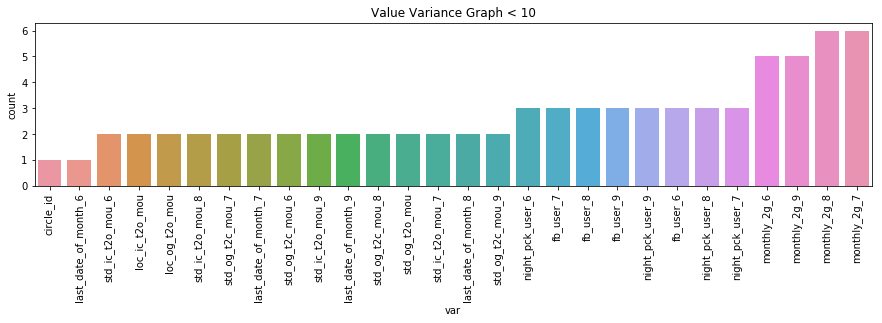

In [350]:
variance_graph_df=val_variance_estimator(telecom_df_base)
val_variance_estimator(telecom_df_base,True,(15,3),graph_filter_limit_max=10)

##### Dropping columns not having much information to add to analysis

In [351]:
#Revisiting the data which don't have variance equal to 1 or 2
variance_graph_df[variance_graph_df['count']<=2]['var']
for i in variance_graph_df[variance_graph_df['count']<=2]['var']:
    print(i," :",telecom_df_base.loc[:,i].unique())
drop_col=list(variance_graph_df[variance_graph_df['count']<=2]['var'])
#Dropping columns with just 2 values
print("As the value of these columns just have 2 values, which is not adding any information, we are going to drop them. As imputing them doesn't make sense")
telecom_df_base.drop(columns=drop_col,inplace=True)

last_date_of_month_9  : ['9/30/2014' nan]
std_ic_t2o_mou_7  : [nan  0.]
last_date_of_month_8  : ['8/31/2014' nan]
std_og_t2o_mou  : [ 0. nan]
std_og_t2c_mou_8  : [ 0. nan]
last_date_of_month_6  : ['6/30/2014']
std_og_t2c_mou_9  : [nan  0.]
std_ic_t2o_mou_9  : [nan  0.]
std_og_t2c_mou_6  : [nan  0.]
last_date_of_month_7  : ['7/31/2014' nan]
circle_id  : [109]
std_ic_t2o_mou_8  : [ 0. nan]
loc_og_t2o_mou  : [ 0. nan]
loc_ic_t2o_mou  : [ 0. nan]
std_ic_t2o_mou_6  : [nan  0.]
std_og_t2c_mou_7  : [nan  0.]
As the value of these columns just have 2 values, which is not adding any information, we are going to drop them. As imputing them doesn't make sense


In [352]:
print(data_loss(master_df,telecom_df_base))
data_set_structure(telecom_df_base).head()

            Col loss  Data Retained  Row loss
Percentage      7.08          92.92       0.0


,Month 6,Month 7,Month 8,Month 9,Common,Total
Non-Numeric,2,2,2,2,0,8
Numeric,50,50,50,50,2,202


##### Checking null or na

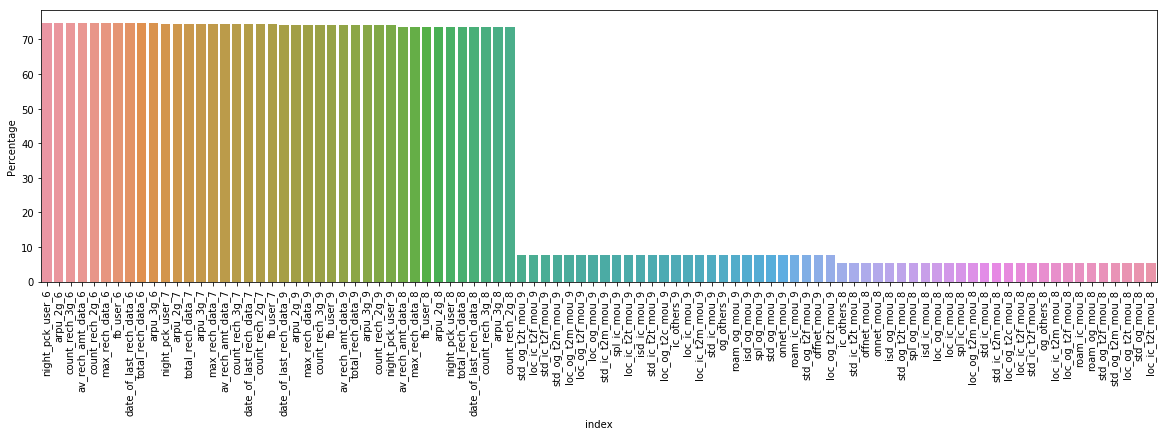

In [353]:
null_na_estimator_grph(telecom_df_base,5,graphical=True,size=(20,5))

##### Imputing features important of modeling

In [354]:
#As some columns will be used in analysis and the value range is only between 0,1,na, we are going to impute them with a new class i.e. -1 for na

for i in variance_graph_df.loc[(variance_graph_df['count']==3)]['var']:
    print(i," :",telecom_df_base.loc[:,i].unique())
impute_col=list(variance_graph_df[variance_graph_df['count']==3]['var'])

print("Imputing a new category of -1 reprsenting a miss: ",impute_col)

telecom_df_base[impute_col]=telecom_df_base[impute_col].fillna(-1)
impute_col=['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
            'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
            'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']

print("Imputing 0 for missing values: ",impute_col)
telecom_df_base[impute_col]=telecom_df_base[impute_col].fillna(0)

night_pck_user_8  : [ 0. nan  1.]
night_pck_user_6  : [ 0. nan  1.]
night_pck_user_7  : [ 0. nan  1.]
night_pck_user_9  : [nan  0.  1.]
fb_user_9  : [nan  1.  0.]
fb_user_8  : [ 1. nan  0.]
fb_user_7  : [ 1. nan  0.]
fb_user_6  : [ 1. nan  0.]
Imputing a new category of -1 reprsenting a miss:  ['night_pck_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_9', 'fb_user_9', 'fb_user_8', 'fb_user_7', 'fb_user_6']
Imputing 0 for missing values:  ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']


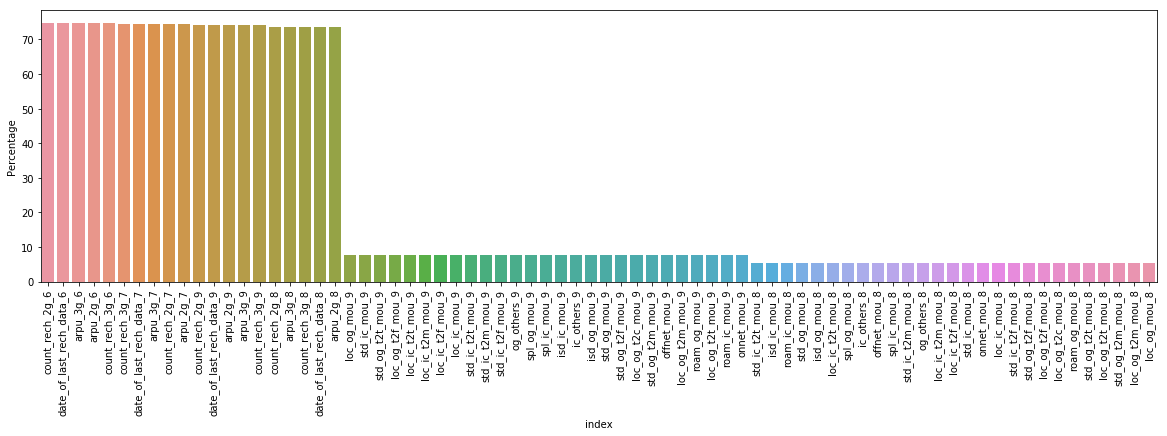

In [355]:
null_na_estimator_grph(telecom_df_base,5,graphical=True,size=(20,5))

In [356]:
telecom_df_base[impute_col].head()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0
1,0.0,154.0,50.0,0.0,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0
2,0.0,0.0,0.0,46.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0


##### Creating High value customer filter set

In [357]:
hv_filter_col=['total_rech_amt_6','total_rech_data_6','total_rech_amt_7','total_rech_data_7',
'total_rech_amt_8','total_rech_data_8','total_rech_amt_9','total_rech_data_9']
#hv_filter_col=['total_rech_amt_6','total_rech_data_6','total_rech_num_6','total_rech_num_7','total_rech_amt_7','total_rech_data_7','total_rech_num_8','total_rech_amt_8','total_rech_data_8','total_rech_num_9','total_rech_amt_9','total_rech_data_9']
print("PRE-Computation: analysis for na/null\n",telecom_df_base[hv_filter_col].isnull().sum())

PRE-Computation: analysis for na/null
 total_rech_amt_6     0
total_rech_data_6    0
total_rech_amt_7     0
total_rech_data_7    0
total_rech_amt_8     0
total_rech_data_8    0
total_rech_amt_9     0
total_rech_data_9    0
dtype: int64


##### Filtering high value customers data

In [358]:
print("Filtering high value customers")
telecom_df_base['total_month_rech_6']=telecom_df_base.loc[:,hv_filter_col[0]]+telecom_df_base.loc[:,hv_filter_col[1]]
telecom_df_base['total_month_rech_7']=telecom_df_base.loc[:,hv_filter_col[2]]+telecom_df_base.loc[:,hv_filter_col[3]]
telecom_df_base['total_month_rech_8']=telecom_df_base.loc[:,hv_filter_col[4]]+telecom_df_base.loc[:,hv_filter_col[5]]
telecom_df_base['total_month_rech_9']=telecom_df_base.loc[:,hv_filter_col[6]]+telecom_df_base.loc[:,hv_filter_col[7]]
#telecom_df_base.to_csv('prehighvalue.csv')
hv_percentile=(telecom_df_base.loc[:,hv_filter_col[0]]+telecom_df_base.loc[:,hv_filter_col[3]]).quantile(.7)
telecom_df_base=telecom_df_base[telecom_df_base.loc[:,hv_filter_col[0]]+telecom_df_base.loc[:,hv_filter_col[3]]>=hv_percentile]
telecom_df_base.reset_index(inplace=True)
print("Dimension of High value customer dataset: ",telecom_df_base.shape)

Filtering high value customers
Dimension of High value customer dataset:  (30061, 215)


##### Converting churn=1 not-churn=0

In [359]:
telecom_df_base['churn']=((telecom_df_base['total_ic_mou_9']+telecom_df_base['total_og_mou_9']>0) & (telecom_df_base['vol_2g_mb_9']+telecom_df_base['vol_3g_mb_9'])>0)
telecom_df_base.loc[:,'churn'].replace({True:1,False:0},inplace=True)

Text(0.5,1,'Telcom Churn Rate')

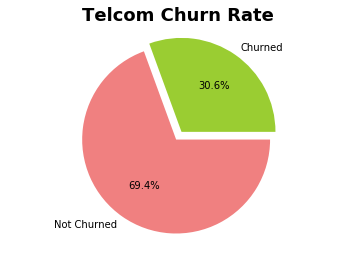

In [360]:
plt.pie(x=[len(telecom_df_base[telecom_df_base['churn']==1]),len(telecom_df_base[telecom_df_base['churn']==0])],labels=['Churned','Not Churned'],autopct='%1.1f%%',colors=['yellowgreen', 'lightcoral'],explode=(.1,0))
plt.axis('equal')
plt.title('Telcom Churn Rate',fontsize=18,fontweight='bold')

##### Seprating Prediction and Training Data 

### NEW Analysis

In [397]:
date_col=[x for x in telecom_df_base.columns if re.search('date',x)!=None]
null_date_col=null_na_estimator_grph(telecom_df_base[date_col],limit_val=0)
null_date_col

date_of_last_rech_data_7    64.33
date_of_last_rech_data_9    63.75
date_of_last_rech_data_8    62.85
date_of_last_rech_data_6    60.90
date_of_last_rech_9          3.91
date_of_last_rech_8          3.05
date_of_last_rech_7          1.23
date_of_last_rech_6          0.00
dtype: float64

#### Now from above it looks like the date_of_last_rech_data_6/7/8/9 having 64 % of data as empty. Instead of impueting these variables at random the best opted way is to impute it wil date_of_last_rech which will result in duplication of the data, so we go ahead and drop these 4 cols and will focus on date_of_last_rech_6/7/8/9

In [412]:
print("We can validate that for the data where date_of_last_rech_6/7/8/9 is having null the respective data column is also null")
print(round(len(telecom_df_base[telecom_df_base['date_of_last_rech_6'].isnull() & telecom_df_base['date_of_last_rech_data_6'].isnull()])/len(telecom_df_base.index)*100,2))
print(round(len(telecom_df_base[telecom_df_base['date_of_last_rech_7'].isnull() & telecom_df_base['date_of_last_rech_data_7'].isnull()])/len(telecom_df_base.index)*100,2))
print(round(len(telecom_df_base[telecom_df_base['date_of_last_rech_8'].isnull() & telecom_df_base['date_of_last_rech_data_8'].isnull()])/len(telecom_df_base.index)*100,2))
print(round(len(telecom_df_base[telecom_df_base['date_of_last_rech_9'].isnull() & telecom_df_base['date_of_last_rech_data_9'].isnull()])/len(telecom_df_base.index)*100,2))

We can validate that for the data where date_of_last_rech_6/7/8/9 is having null the respective data column is also null
0.0
1.23
3.05
3.91


In [361]:
#print(telecom_df_base[['date_of_last_rech_data_7','date_of_last_rech_7']].info())
lrd_7=telecom_df_base[['date_of_last_rech_data_7','date_of_last_rech_7']]
lrd_7['status']=lrd_7['date_of_last_rech_data_7'].isna()
lrd_7.head()
lrd_7['date_of_last_rech_data_7']=lrd_7.apply(lambda row: row['date_of_last_rech_7'] if row['status']==True else row['date_of_last_rech_data_7'],axis=1)

C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [362]:
lrd_6=telecom_df_base[['date_of_last_rech_data_6','date_of_last_rech_6']]
lrd_6['status']=lrd_6['date_of_last_rech_data_6'].isna()
print(lrd_6.head())
lrd_6['date_of_last_rech_data_6']=lrd_6.apply(lambda row: row['date_of_last_rech_6'] if row['status']==True else row['date_of_last_rech_data_6'],axis=1)
print(lrd_6.head())

C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


  date_of_last_rech_data_6 date_of_last_rech_6  status
0                      NaN           6/28/2014    True
1                      NaN           6/27/2014    True
2                      NaN           6/25/2014    True
3                      NaN           6/20/2014    True
4                      NaN           6/30/2014    True
  date_of_last_rech_data_6 date_of_last_rech_6  status
0                6/28/2014           6/28/2014    True
1                6/27/2014           6/27/2014    True
2                6/25/2014           6/25/2014    True
3                6/20/2014           6/20/2014    True
4                6/30/2014           6/30/2014    True


C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [363]:
lrd_8=telecom_df_base[['date_of_last_rech_data_8','date_of_last_rech_8']]
lrd_8['status']=lrd_8['date_of_last_rech_data_8'].isna()
print(lrd_8.head())
lrd_8['date_of_last_rech_data_8']=lrd_8.apply(lambda row: row['date_of_last_rech_8'] if row['status']==True else row['date_of_last_rech_data_8'],axis=1)
print(lrd_8.head())

C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


  date_of_last_rech_data_8 date_of_last_rech_8  status
0                      NaN           8/28/2014    True
1                      NaN           8/26/2014    True
2                8/23/2014           8/30/2014   False
3                8/30/2014           8/30/2014   False
4                      NaN           8/14/2014    True
  date_of_last_rech_data_8 date_of_last_rech_8  status
0                8/28/2014           8/28/2014    True
1                8/26/2014           8/26/2014    True
2                8/23/2014           8/30/2014   False
3                8/30/2014           8/30/2014   False
4                8/14/2014           8/14/2014    True


C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [392]:
date_imp_df=pd.concat([lrd_6.drop('status',axis=1),lrd_7.drop('status',axis=1),lrd_8.drop('status',axis=1),telecom_df_base['churn']],axis=1)

In [393]:
date_imp_df_copy=date_imp_df.copy()
print(date_imp_df.shape)
null_na_estimator_grph(date_imp_df,limit_val=.2)

(30061, 7)


date_of_last_rech_8         3.05
date_of_last_rech_data_8    3.05
date_of_last_rech_7         1.23
date_of_last_rech_data_7    1.23
dtype: float64

In [394]:
date_imp_df.dropna(subset=['date_of_last_rech_8', 'date_of_last_rech_7'],inplace=True)
date_imp_df.shape

(28947, 7)

In [395]:
for col in date_imp_df.columns.drop('churn'):
    date_imp_df[col]=pd.to_datetime(date_imp_df[col],format="%m/%d/%Y")
date_imp_df['day_6']=date_imp_df['date_of_last_rech_6'].apply(lambda x: x.day)
date_imp_df['day_7']=date_imp_df['date_of_last_rech_7'].apply(lambda x: x.day)
date_imp_df['day_8']=date_imp_df['date_of_last_rech_8'].apply(lambda x: x.day)

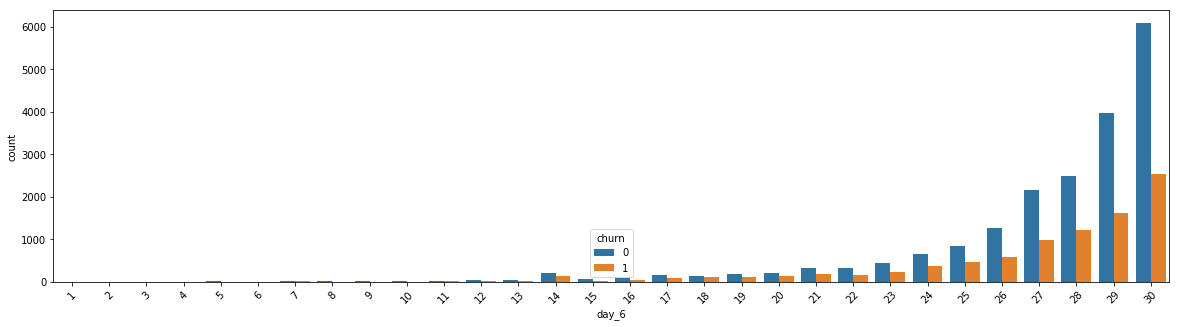

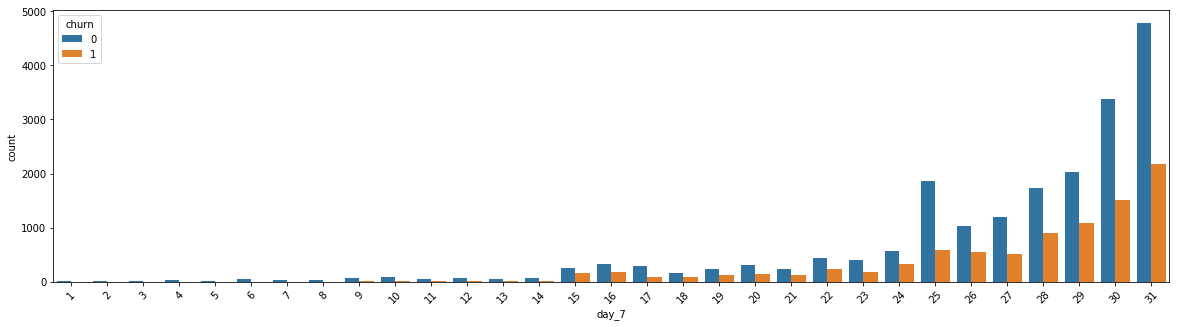

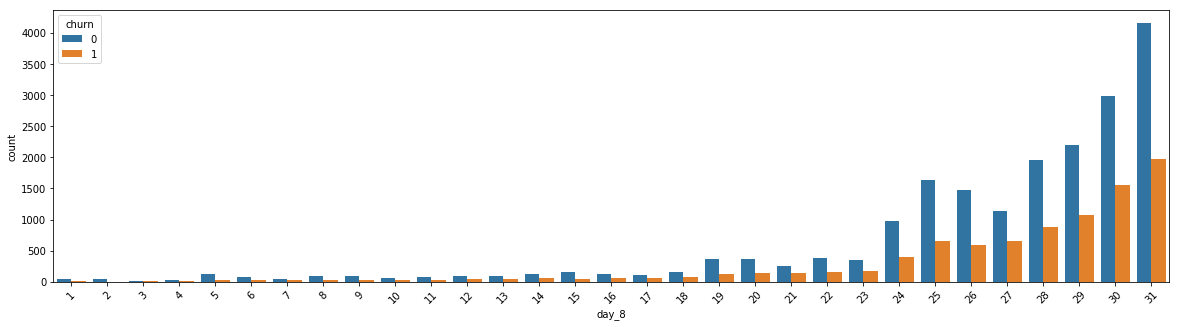

In [396]:
date_imp_df
#date_imp_df.sort_values(by='date_of_last_rech_data_6')
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.countplot(x='day_6',hue='churn',data=date_imp_df.sort_values(by='day_6'))
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.countplot(x='day_7',hue='churn',data=date_imp_df.sort_values(by='day_7'))
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.countplot(x='day_8',hue='churn',data=date_imp_df.sort_values(by='day_8'))

#### Changing the data-type of date columns 

In [229]:
date_col=[x for x in telecom_df_base.columns if re.search('date',x)!=None]
date_col
for i in date_col:
    telecom_df_base[i]=pd.to_datetime(telecom_df_base[i],format="%m/%d/%Y")
#telecom_data_analysis['date_of_last_rech_data_7']
#telecom_data_analysis['date_of_last_rech_data_7']=pd.to_datetime(telecom_data_analysis['date_of_last_rech_data_7'],format="%m/%d/%Y")
#null_na_estimator_grph(telecom_data_analysis[date_col],limit_val=.5)

#### Now we are looking at null % for date columns

date_of_last_rech_data_7    64.33
date_of_last_rech_data_9    63.75
date_of_last_rech_data_8    62.85
date_of_last_rech_data_6    60.90
date_of_last_rech_9          3.91
date_of_last_rech_8          3.05
date_of_last_rech_7          1.23
date_of_last_rech_6          0.00
dtype: float64

In [260]:
df = pd.DataFrame(
    np.array([[1, 2, 3], [4, 5, np.nan], [7, 8, 9], [3, 2, np.nan], [5, 6, np.nan]]), 
    columns=['a', 'b', 'c']
)
df['c'] = df.apply(lambda row: row['a'] if np.isnan(row['c']) else row['c'],
    axis=1
)
df

,a,b,c
0,1.0,2.0,3.0
1,4.0,5.0,4.0
2,7.0,8.0,9.0
3,3.0,2.0,3.0
4,5.0,6.0,5.0


In [290]:
# As we can see the date_of_last_rech_month is having very less % age of the 
# null so we will impute the value of date_of_last_rech_data_month by it
lrd_7=telecom_df_base[['date_of_last_rech_data_7','date_of_last_rech_7']]
lrd_7[lrd_7['date_of_last_rech_data_7'].isnull()==False]
#type(lrd_7['date_of_last_rech_data_7'][2])
#null_checker=lambda x: (x['date_of_last_rech_data_7'],x['date_of_last_rech_7'])[x['date_of_last_rech_data_7'].isnull()==False]
#lrd_7.apply(null_checker,axis=1)
#lrd_7.apply(lambda row: row['date_of_last_rech_7'] if np.isnull(row['date_of_last_rech_data_7']) else row['date_of_last_rech_data_7'],axis=1)
#lrd_7['date_of_last_rech_7'] if lrd_7['date_of_last_rech_data_7'].isnull() else lrd_7['date_of_last_rech_data_7']
#(lrd_7['date_of_last_rech_data_7'],lrd_7['date_of_last_rech_7'])[lrd_7['date_of_last_rech_data_7'].isnull()==False]
#lrd_7=[telecom_df_base['date_of_last_rech_data_7'].isnull()==True]

#telecom_df_base[telecom_df_base['date_of_last_rech_data_7'].isnull()==True][['date_of_last_rech_data_7','date_of_last_rech_7']]
#telecom_df_base[telecom_df_base['date_of_last_rech_7'].isnull()==False]['date_of_last_rech_7']

,date_of_last_rech_data_7,date_of_last_rech_7
2,2014-07-31,2014-07-31
9,2014-07-28,2014-07-30
10,2014-07-12,2014-07-19
16,2014-07-26,2014-07-31
17,2014-07-27,2014-07-30
18,2014-07-26,2014-07-26
20,2014-07-10,2014-07-29
22,2014-07-10,2014-07-31
24,2014-07-29,2014-07-29
25,2014-07-23,2014-07-29


In [133]:
non_num_col,num_col,col_6,col_7,col_8,col_9=data_set_structure(telecom_df_base,return_tuple=True)
telecom_data_analysis=telecom_df_base.drop(columns=col_9,axis=1)

In [178]:
drop_col=null_na_estimator_grph(telecom_data_analysis,limit_val=1)
drop_col

date_of_last_rech_data_7    64.33
count_rech_2g_7             64.33
count_rech_3g_7             64.33
arpu_3g_7                   64.33
arpu_2g_7                   64.33
date_of_last_rech_data_8    62.85
arpu_2g_8                   62.85
count_rech_2g_8             62.85
count_rech_3g_8             62.85
arpu_3g_8                   62.85
date_of_last_rech_data_6    60.90
count_rech_2g_6             60.90
count_rech_3g_6             60.90
arpu_3g_6                   60.90
arpu_2g_6                   60.90
std_ic_t2m_mou_8             5.11
loc_og_t2f_mou_8             5.11
loc_ic_t2t_mou_8             5.11
std_og_mou_8                 5.11
std_og_t2m_mou_8             5.11
isd_og_mou_8                 5.11
std_og_t2t_mou_8             5.11
loc_ic_t2m_mou_8             5.11
loc_ic_t2f_mou_8             5.11
onnet_mou_8                  5.11
loc_ic_mou_8                 5.11
spl_og_mou_8                 5.11
loc_og_mou_8                 5.11
og_others_8                  5.11
loc_og_t2c_mou

In [160]:
groupped=telecom_data_analysis.groupby('date_of_last_rech_data_7')
type(telecom_data_analysis['date_of_last_rech_data_7'])


str

In [179]:
non_num_col

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

##### Dropping all data with some null the dimesion reduction is = (29999, 163) -> (29999, 92)

In [83]:
telecom_data_analysis.drop(columns=drop_col.index,axis=1,inplace=True)
print(telecom_data_analysis.shape)

(29999, 92)


In [84]:
non_num_col,num_col,col_6,col_7,col_8,col_9=data_set_structure(telecom_data_analysis,return_tuple=True)

In [85]:
print("Dropping the last non-numeric column")
telecom_data_analysis.drop(columns=non_num_col,inplace=True)

Dropping the last non-numeric column


In [86]:
telecom_data_analysis.describe()

,index,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
count,29999.000000,2.999900e+04,29999.000000,29999.000000,29999.000000,29790.000000,29790.000000,29790.000000,29790.00000,29790.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,49867.726491,7.001219e+09,605.639681,525.014991,486.463507,308.420193,432.709161,17.652427,30.24088,96.339182,...,-0.326944,-0.317111,1250.504317,120.200344,125.835120,122.318149,733.268876,600.679523,565.873396,0.305610
std,28954.380627,6.866086e+05,429.261151,474.200662,494.363385,463.558304,468.741035,79.049456,119.76765,239.066437,...,0.923779,0.916297,968.642629,374.441003,393.847836,387.324365,515.182770,575.336149,602.569751,0.460673
min,6.000000,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.00000,0.000000,...,-1.000000,-1.000000,180.000000,0.000000,0.000000,0.000000,367.000000,0.000000,0.000000,0.000000
25%,24758.500000,7.000635e+09,388.483500,282.665500,225.854000,45.515000,150.450000,0.000000,0.00000,9.610000,...,-1.000000,-1.000000,476.000000,0.000000,0.000000,0.000000,470.000000,299.000000,251.000000,0.000000
50%,49727.000000,7.001226e+09,501.281000,439.068000,408.488000,135.895000,299.020000,0.000000,0.00000,33.890000,...,-1.000000,-1.000000,896.000000,0.000000,0.000000,0.000000,596.000000,503.000000,476.000000,0.000000
75%,74940.500000,7.001810e+09,702.362000,663.345500,636.596000,380.702500,545.282500,0.000000,0.00000,93.380000,...,1.000000,1.000000,1885.000000,0.000000,0.000000,0.000000,839.000000,777.000000,750.000000,1.000000
max,99998.000000,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8362.360000,2613.310000,3775.11000,6431.330000,...,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,35190.000000,40335.000000,45320.000000,1.000000


std_og_t2f_mou_6    0.7
std_og_t2m_mou_6    0.7
std_ic_mou_6        0.7
std_ic_t2f_mou_6    0.7
std_ic_t2m_mou_6    0.7
std_ic_t2t_mou_6    0.7
loc_ic_mou_6        0.7
loc_ic_t2f_mou_6    0.7
loc_ic_t2m_mou_6    0.7
loc_ic_t2t_mou_6    0.7
isd_ic_mou_6        0.7
ic_others_6         0.7
og_others_6         0.7
spl_og_mou_6        0.7
isd_og_mou_6        0.7
std_og_mou_6        0.7
spl_ic_mou_6        0.7
roam_og_mou_6       0.7
loc_og_mou_6        0.7
loc_og_t2c_mou_6    0.7
loc_og_t2f_mou_6    0.7
loc_og_t2m_mou_6    0.7
loc_og_t2t_mou_6    0.7
std_og_t2t_mou_6    0.7
roam_ic_mou_6       0.7
offnet_mou_6        0.7
onnet_mou_6         0.7
dtype: float64

In [88]:
drop_col=null_na_estimator_grph(telecom_data_analysis,limit_val=.5)
telecom_data_analysis.drop(columns=drop_col.index,axis=1,inplace=True)
print(telecom_data_analysis.shape)

(29999, 64)


In [32]:
X_train=telecom_data_analysis.drop(columns='churn')
y_train=telecom_data_analysis['churn']
x_predicted=col_6.append(col_7).append(col_8)
X_test=telecom_data_analysis

In [33]:
#plt.figure(figsize = (20,10))        # Size of the figure
#sns.heatmap(X_train.corr(),annot = True)
null_na_estimator_grph(X_train)

total_month_rech_8    0.0
total_rech_amt_7      0.0
max_rech_data_8       0.0
max_rech_data_7       0.0
max_rech_data_6       0.0
total_rech_data_8     0.0
total_rech_data_7     0.0
total_rech_data_6     0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_6    0.0
max_rech_amt_8        0.0
max_rech_amt_7        0.0
max_rech_amt_6        0.0
total_rech_amt_8      0.0
total_rech_amt_6      0.0
av_rech_amt_data_7    0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
total_rech_num_6      0.0
total_ic_mou_8        0.0
total_ic_mou_7        0.0
total_ic_mou_6        0.0
total_og_mou_8        0.0
total_og_mou_7        0.0
total_og_mou_6        0.0
arpu_8                0.0
arpu_7                0.0
arpu_6                0.0
mobile_number         0.0
                     ... 
monthly_3g_6          0.0
total_month_rech_6    0.0
vbc_3g_6              0.0
vbc_3g_7              0.0
vbc_3g_8              0.0
aon                   0.0
fb_user_8             0.0
fb_user_7   

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_scaler = StandardScaler().fit_transform(X_train)

In [35]:
pca = PCA(svd_solver='randomized', random_state=100)
pca_base=pca.fit_transform(X_train)
pca_base.shape

(29999, 63)

In [50]:
from sklearn.decomposition import IncrementalPCA
pca_5 = IncrementalPCA(n_components=5)
pca_5_base=pca_5.fit_transform(X_train)
pca_5_base.shape

(29999, 5)

In [43]:
corrmat = np.corrcoef(pca_base.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.006452875991906663 , min corr:  -0.0256814620883207


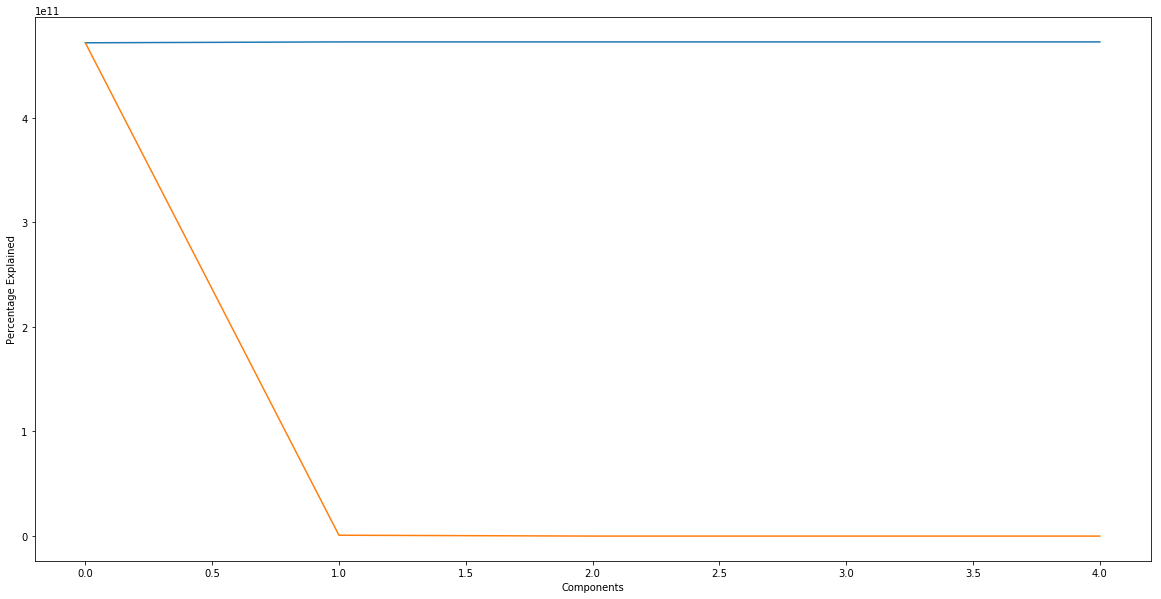

In [56]:
pca_2 = IncrementalPCA(n_components=5)
pca_2_base=pca_2.fit_transform(X_train)
pca_2_base.shape
plt.figure(figsize=(20,10))
plt.xlabel('Components')
plt.ylabel('Percentage Explained')
plt.plot(np.cumsum(pca_2.explained_variance_))
plt.plot(pca_2.explained_variance_)
plt.show()
from sklearn.linear_model import LogisticRegression
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(pca_2_base,y_train)

In [ ]:
y_pred=model_pca2.predict_proba()

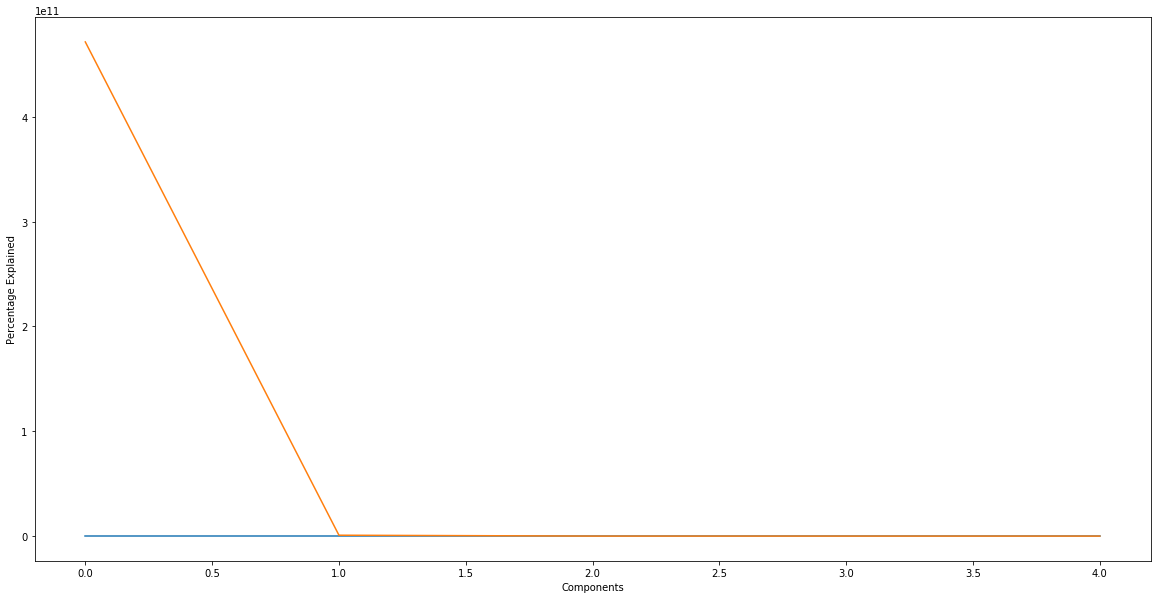

In [51]:
plt.figure(figsize=(20,10))
plt.xlabel('Components')
plt.ylabel('Percentage Explained')
plt.plot(np.cumsum(pca_5.explained_variance_ratio_))
plt.plot(pca_5.explained_variance_)
plt.show()

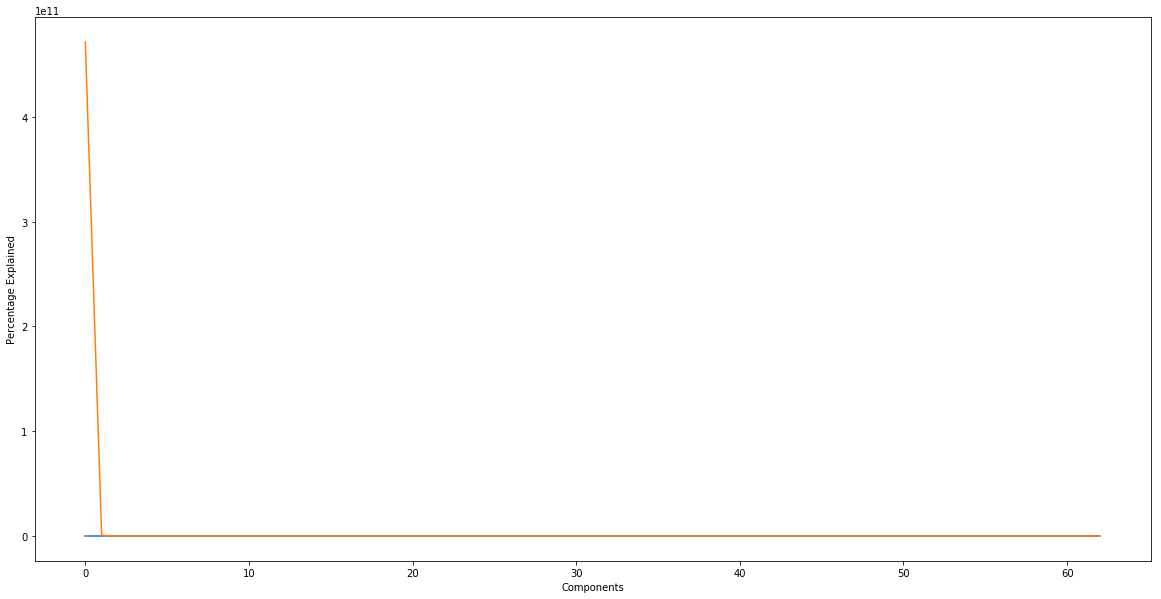

In [47]:
plt.figure(figsize=(20,10))
plt.xlabel('Components')
plt.ylabel('Percentage Explained')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_)
plt.show()

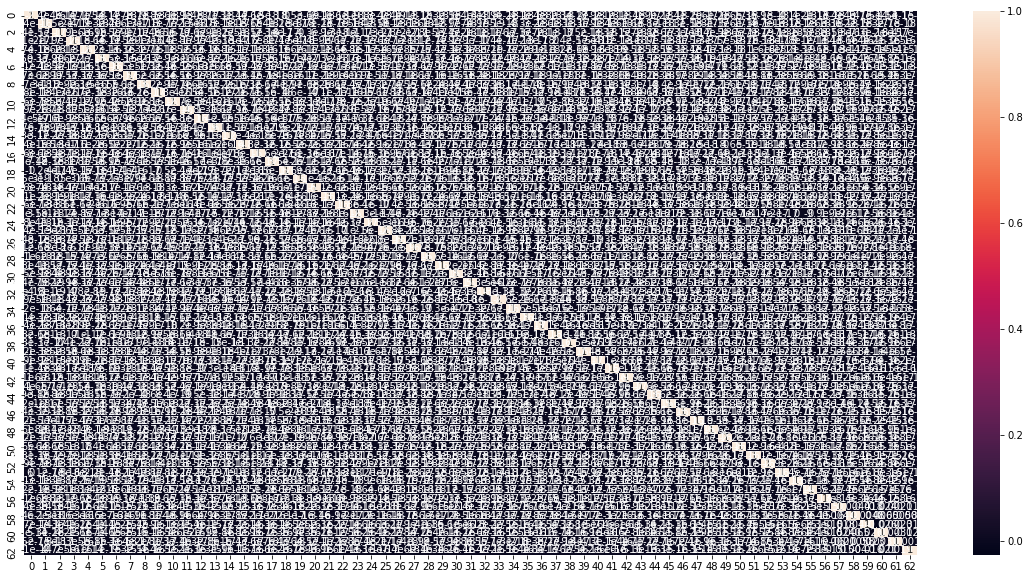

In [42]:
plt.figure(figsize = (20,10))
sns.heatmap(data=corrmat,annot=True)